In [90]:
import numpy as np
import corner
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import pickle

In [92]:
sample_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]

for sample_size in sample_sizes:
    with open('../data/models/epidemiology2d/histogram/model_singletheta_trainingsamplesize_' + str(sample_size) + '_histos.pickle', 'rb') as file:
        histos = pickle.load(file)
        
    hsum = np.sum(histos[0])
    print(hsum)
    

2.849512726180084
12.734170593732694
1.4560220629511478
0.7688547039613475
0.7669019665729848
0.3844874608845994
0.37748613376861656
0.300760688278153
0.27837662130048724


In [83]:
with open('../data/models/epidemiology2d/histogram/model_singletheta_edges.pickle', 'rb') as file:
    edges = pickle.load(file)
with open('../data/models/epidemiology2d/histogram/model_singletheta_histos.pickle', 'rb') as file:
    histos = pickle.load(file)
n_bins = [h.shape for h in histos]

In [84]:
histo2d = histos[0][0,0,0,:,0,0,:,0]
edges2d = [edges[0][3], edges[0][6]]
nbins2d = histo2d.shape

print(edges2d)

[array([ 3.99,  9.  , 10.  , 11.  , 12.  , 13.  , 14.  , 15.  , 16.  ,
       23.01]), array([0.0654717 , 0.70811321])]


In [85]:
def p_hat(x):
    histo_indices = []

    for j in range(x.shape[1]):
        indices = np.searchsorted(edges2d[j],
                                  x[:, j],
                                  side="right") - 1

        indices[indices < 0] = 0
        indices[indices >= nbins2d[j]] = nbins2d[j] - 1

        histo_indices.append(indices)

    return histo2d[histo_indices]

In [86]:
xi = np.linspace(0.,30., 100)
yi = np.linspace(0., 1., 100)

xx, yy = np.meshgrid(xi, yi)

x = np.vstack((xx.flatten(), yy.flatten())).T

p_hat_thetas = p_hat(x).reshape((100,100))

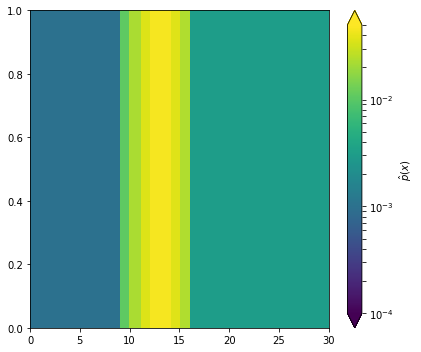

In [89]:
fig = plt.figure(figsize=(6, 5))
ax = plt.gca()

pcm = ax.pcolormesh(xi, yi, p_hat_thetas,
                    norm=matplotlib.colors.LogNorm(vmin=1.e-4, vmax=0.05),
                    cmap='viridis')
cbar = fig.colorbar(pcm, ax=ax, extend='both')

cbar.set_label(r'$\hat{p}(x)$')
plt.xlim(0.,30.)
plt.ylim(0., 1.)

plt.tight_layout()